# Data visualisation

Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
import math
import json

#To dowload data
import requests
import io

#To create the mapchart
import iso3166
import plotly
from iso3166 import countries
import plotly.graph_objects as go

## Load Data

In [8]:

# Add this in helper file
import json
import pickle
import gzip
def load_aggregated(aggregated_path):
    if aggregated_path.endswith(".gz"):
        with gzip.open(aggregated_path, "rb") as f:
            agg = json.loads(f.read().decode())
    else:
        with open(aggregated_path, "rb") as f:
            agg = pickle.load(f)

    for k1, i1 in agg.items():
        for k2, i2 in agg[k1].items():
            if type(agg[k1][k2]) == pd.Series:
                agg[k1][k2].index = pd.to_datetime(agg[k1][k2].index, errors="ignore")
            elif (type(agg[k1][k2]) == dict) and len(list(agg[k1][k2].keys())) > 100:
                agg[k1][k2] = pd.Series(agg[k1][k2])
                agg[k1][k2].index = pd.to_datetime(agg[k1][k2].index, errors="ignore")
            elif type(agg[k1][k2]) == dict:
                for k3, i3 in agg[k1][k2].items():
                    if type(agg[k1][k2][k3]) == pd.Series:
                        agg[k1][k2][k3].index = pd.to_datetime(agg[k1][k2][k3].index, errors="ignore")
                    elif (type(agg[k1][k2][k3]) == dict) and len(list(agg[k1][k2][k3].keys())) > 100:
                        agg[k1][k2][k3] = pd.Series(agg[k1][k2][k3])
                        agg[k1][k2][k3].index = pd.to_datetime(agg[k1][k2][k3].index, errors="ignore")
                    elif type(agg[k1][k2][k3]) == dict:
                        for k4, i4 in agg[k1][k2][k3].items():
                            if type(agg[k1][k2][k3][k4]) == pd.Series:
                                agg[k1][k2][k3][k4].index = pd.to_datetime(agg[k1][k2][k3][k4].index, errors="ignore")
                            elif (type(agg[k1][k2][k3][k4]) == dict) and len(list(agg[k1][k2][k3][k4].keys())) > 100:
                                agg[k1][k2][k3][k4] = pd.Series(agg[k1][k2][k3][k4])
                                agg[k1][k2][k3][k4].index = pd.to_datetime(agg[k1][k2][k3][k4].index, errors="ignore")
    return agg




In [41]:
data_folder = 'data/'

google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv')
interventions = pd.read_csv(data_folder+'interventions.csv')
topics = pd.read_csv(data_folder+'topics_linked.csv')
apple_mobility = pd.read_csv(data_folder+'applemobilitytrends-2020-04-20.csv')

file = open(data_folder+'aggregated_timeseries.json')
data = json.load(file)

/var/folders/yd/qcqcvgvx64j3l0qqnk__2cpm0000gn/T/ipykernel_41139/3881919106.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  google_mobility = pd.read_csv(data_folder+'Global_Mobility_Report.csv')


In [44]:
topics

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q5465542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306121,Faimaala_Filipo,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,Q84090991
4306122,Jonathan_Horne,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1666264
4306123,Steven_Da_Costa,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q22921600
4306124,The_Silence_of_Dr._Evans,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,Q4301095


In [11]:
interventions

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


In [45]:
#Transform all the string date of interventions to datetime
interventions[interventions.columns[1:]] = interventions[interventions.columns[1:]].apply(pd.to_datetime)

In [46]:
#Transform date string to datetime
google_mobility['date'] = pd.to_datetime(google_mobility['date'])
google_mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111407,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-19,NaN,NaN,NaN,NaN,-9.0,NaN
2111408,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-20,NaN,NaN,NaN,NaN,-5.0,NaN
2111409,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-21,NaN,NaN,NaN,NaN,-5.0,NaN
2111410,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-24,NaN,NaN,NaN,NaN,-4.0,NaN


In [20]:
apple_mobility

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,city,Washington DC,transit,100,100.78,103.92,105.02,112.26,96.01,87.76,...,16.99,14.23,17.01,17.37,17.02,17.10,17.14,16.61,16.66,18.20
391,city,Washington DC,walking,100,99.07,109.61,104.16,123.16,119.71,106.28,...,44.63,32.84,33.58,37.56,38.69,37.76,42.50,41.80,43.51,41.89
392,city,Zurich,driving,100,102.38,110.84,105.48,113.83,109.67,102.03,...,63.78,54.97,67.09,72.52,74.89,77.13,78.01,73.62,71.97,73.74
393,city,Zurich,transit,100,101.51,108.93,97.87,103.91,98.50,93.83,...,29.18,31.49,32.90,35.71,35.68,33.65,36.77,36.75,37.66,37.50


In [31]:
data

{'ja.m': {'len': 1197788,
  'sum': 2018-01-01    22328288
  2018-01-02    22278953
  2018-01-03    23632758
  2018-01-04    21893587
  2018-01-05    20734837
                  ...   
  2020-07-27    24801067
  2020-07-28    23559955
  2020-07-29    23674563
  2020-07-30    22409433
  2020-07-31    21678081
  Length: 943, dtype: int64,
  'covid': {'len': 30,
   'sum': 2018-01-01      55
   2018-01-02      55
   2018-01-03      51
   2018-01-04      46
   2018-01-05      70
                 ... 
   2020-07-27    5569
   2020-07-28    5445
   2020-07-29    6197
   2020-07-30    6202
   2020-07-31    6177
   Length: 943, dtype: int64,
   'percent': 2018-01-01    0.000002
   2018-01-02    0.000002
   2018-01-03    0.000002
   2018-01-04    0.000002
   2018-01-05    0.000003
                   ...   
   2020-07-27    0.000225
   2020-07-28    0.000231
   2020-07-29    0.000262
   2020-07-30    0.000277
   2020-07-31    0.000285
   Length: 943, dtype: float64},
  'topics': {'Culture.Biography

## Time Series analysis 
### Covid pageviews on Wikipedia
First we will extract and analyse the timeseries of covid related pageviews on wikipedia 

In [47]:
#Dataframe for each language and number of covid pages per day
covid_pages_desktop = {}
covid_pages_mobile = {}
for language in interventions['lang']:
    #Extract number of covid pages search on desktop per day per language in 2020
    covid_pages_desktop[language] = pd.DataFrame.from_dict(data[str(language)]["covid"]["sum"], orient='index')
    covid_pages_desktop[language] = (covid_pages_desktop[language]).loc[(covid_pages_desktop[language].index < "2021-01-01") & (covid_pages_desktop[language].index > "2019-12-31")]
    #Transform index of each data frame to datetime format
    covid_pages_desktop[language].index = pd.to_datetime(covid_pages_desktop[language].index)
    
    #Extract number of covid pages search on mobile devices per day per language in 2020
    covid_pages_mobile[language] = pd.DataFrame.from_dict(data[str(language)+".m"]["covid"]["sum"], orient='index')
    covid_pages_mobile[language] = (covid_pages_mobile[language]).loc[(covid_pages_mobile[language].index < "2021-01-01") & (covid_pages_mobile[language].index > "2019-12-31")]
    #Transform index of each data frame to datetime format
    covid_pages_mobile[language].index = pd.to_datetime(covid_pages_mobile[language].index)

Max increase search covid pages in fr appears the 2020-03-16 00:00:00
Difference in days: 0   -1 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in da appears the 2020-04-18 00:00:00
Difference in days: 1   31 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in de appears the 2020-03-19 00:00:00
Difference in days: 2   -3 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in it appears the 2020-03-12 00:00:00
Difference in days: 3   1 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in nl appears the 2020-03-27 00:00:00
Difference in days: 4   NaT
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in no appears the 2020-04-20 00:00:00
Difference in days: 5   27 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in sr appears the 2020-04-02 00:00:00
Difference in days: 6   12 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase searc

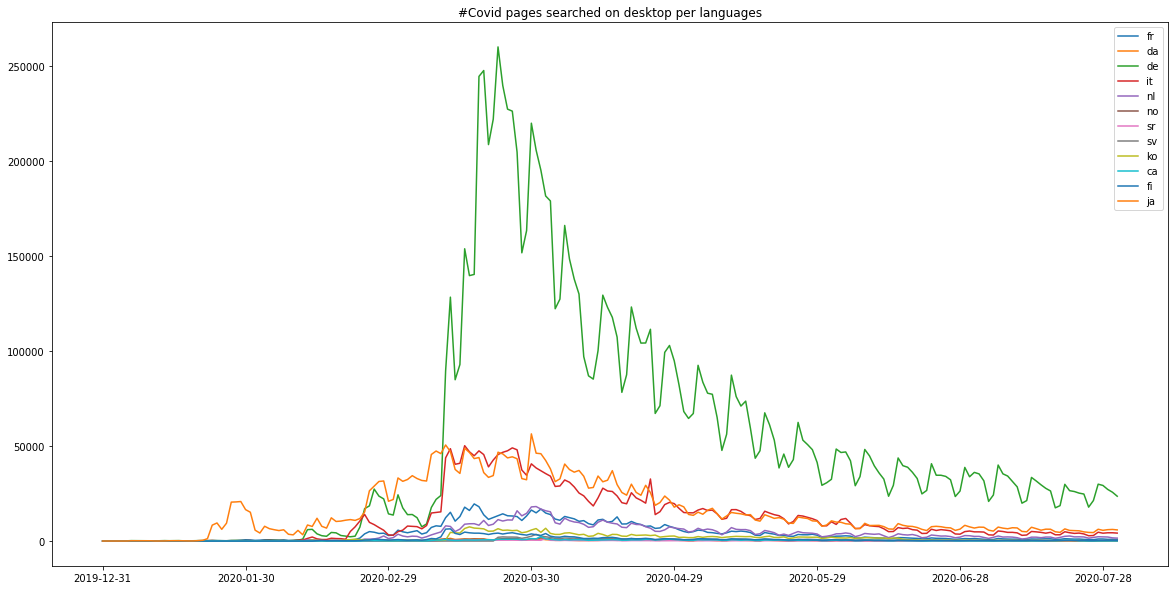

In [48]:
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    #Compute the difference between year t and year t-1
    covid_pages_desktop[language]["increase"] = covid_pages_desktop[language][0]-covid_pages_desktop[language][0].shift(1)
    print("Max increase search covid pages in {} appears the {}".format(language,covid_pages_desktop[language]["increase"].idxmax()))
    
    #Compare the date with the higher increase with the lockdown date
    print("Difference in days: {}".format(covid_pages_desktop[language]["increase"].idxmax()-interventions[interventions["lang"]==language]["Lockdown"]))
    
    #Plot the evolution of the number of pages search on desktop per language
    if (language != "en"):
        plt.plot(covid_pages_desktop[language][0],label=str(language))
plt.legend()
plt.title("#Covid pages searched on desktop per languages")
skip = 30 #To show only the date on x-axis every month
plt.xticks(covid_pages_mobile[language].index[::skip])
plt.show()

Max increase search covid pages in fr appears the 2020-03-12 00:00:00
Difference in days: 0   -5 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in da appears the 2020-03-11 00:00:00
Difference in days: 1   -7 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in de appears the 2020-03-12 00:00:00
Difference in days: 2   -10 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in it appears the 2020-03-12 00:00:00
Difference in days: 3   1 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in nl appears the 2020-03-27 00:00:00
Difference in days: 4   NaT
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in no appears the 2020-03-11 00:00:00
Difference in days: 5   -13 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase search covid pages in sr appears the 2020-03-29 00:00:00
Difference in days: 6   8 days
Name: Lockdown, dtype: timedelta64[ns]
Max increase sear

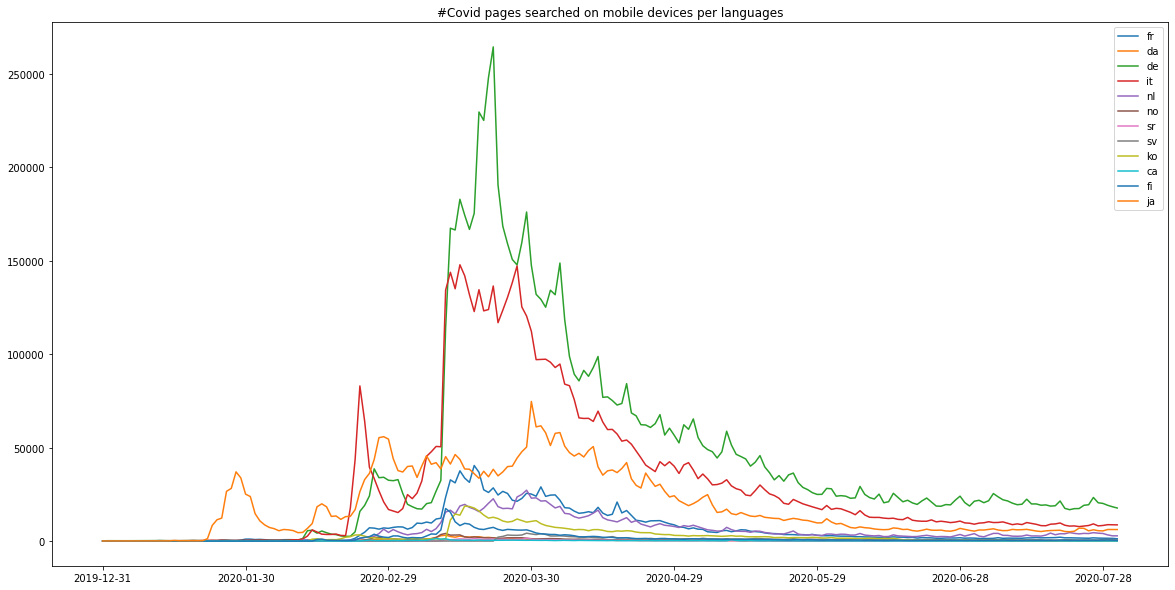

In [123]:
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    #Compute the difference between year t and year t-1
    covid_pages_mobile[language]["increase"] = covid_pages_mobile[language][0]-covid_pages_mobile[language][0].shift(1)
    print("Max increase search covid pages in {} appears the {}".format(language, covid_pages_mobile[language]["increase"].idxmax()))
    
    #Compare the date with the higher increase with the lockdown date
    print("Difference in days: {}".format(covid_pages_mobile[language]["increase"].idxmax()-interventions[interventions["lang"]==language]["Lockdown"]))
    
    #Plot the evolution of the number of pages search on mobile devices per language
    if (language != "en"):
        plt.plot(covid_pages_mobile[language][0],label=str(language))
plt.legend()
plt.title("#Covid pages searched on mobile devices per languages")
skip = 30
plt.xticks(covid_pages_mobile[language].index[::skip])
plt.show()

### Check for stationarity of timeseries
We want to look at the manner in which the timeseries changes is constant or not. For this we can user the Dickey Fuller test to check for stationarity in our timeseries, with the null hypothesis that there is no stationarity.   

1. Desktop searches

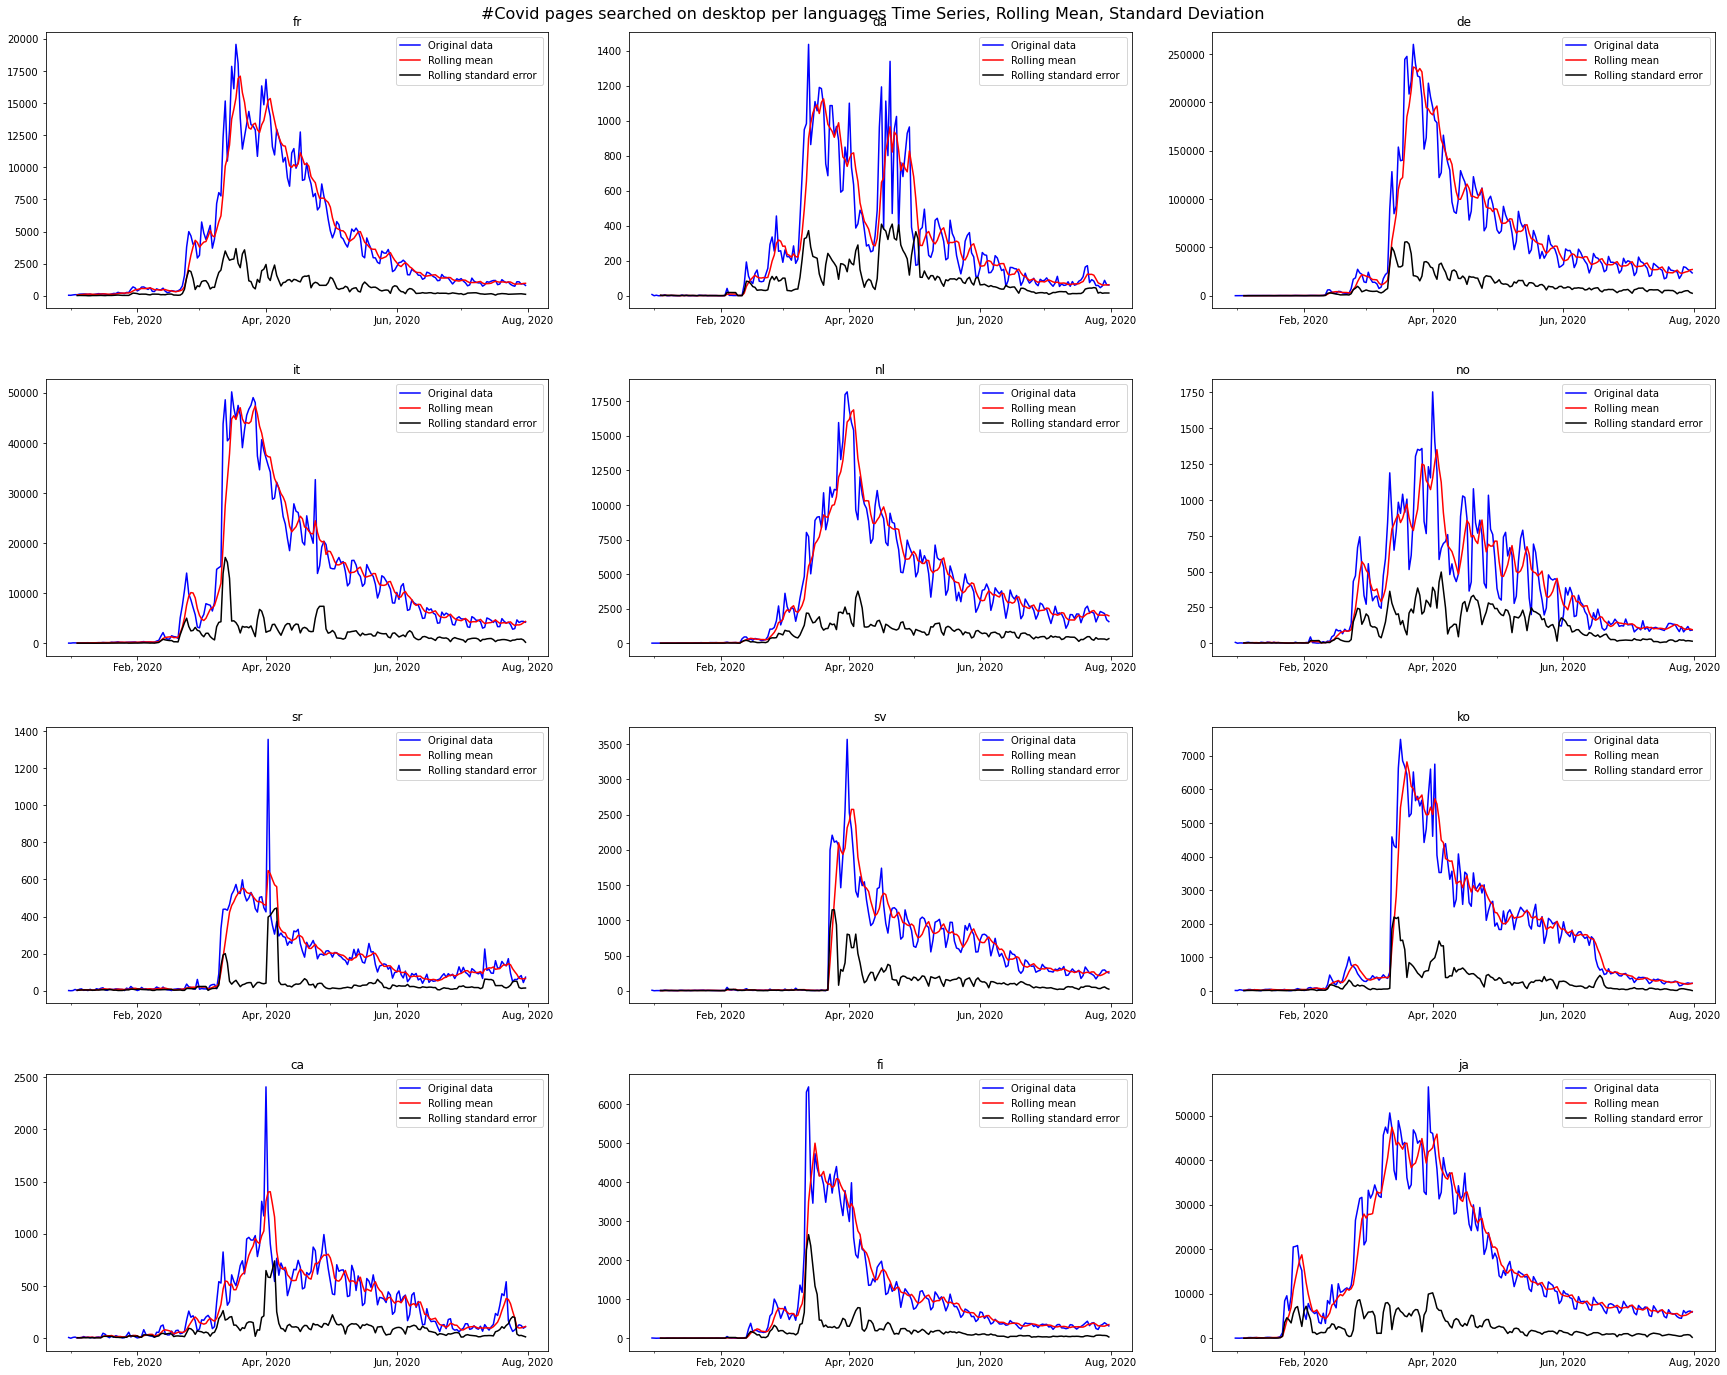

In [122]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(4, 3)
fig.set_figwidth(25)
fig.set_figheight(20)
fig.tight_layout(pad=5.0)
half_year_locator = mdates.MonthLocator(interval=2)
month_year_formatter = mdates.DateFormatter('%b, %Y') 
monthly_locator = mdates.MonthLocator()
fig.suptitle("#Covid pages searched on desktop per languages Time Series, Rolling Mean, Standard Deviation", fontsize=16)


x = 0
y = 0
for language in interventions['lang']:
    if (language != "en"):
        #Compute the rolling mean for each country over 5 days
        covid_pages_desktop[language]["rolling_mean"] = covid_pages_desktop[language][0].rolling(5).mean()
    
        #Compute the rolling standard error for each country over 5 days
        covid_pages_desktop[language]["rolling_std"] = covid_pages_desktop[language][0].rolling(5).std()

       

        #Plot the evolution of the number of pages search on desktop per language
        axs[x, y].plot(covid_pages_desktop[language][0],label='Original data',  color="blue")
        axs[x, y].plot(covid_pages_desktop[language]["rolling_mean"],label='Rolling mean',  color="red")
        axs[x, y].plot(covid_pages_desktop[language]["rolling_std"],label='Rolling standard error ',  color="black")
        axs[x, y].xaxis.set_major_locator(half_year_locator)
        axs[x, y].xaxis.set_minor_locator(monthly_locator)
        axs[x, y].xaxis.set_major_formatter(month_year_formatter)
        axs[x, y].set_title(str(language))
        axs[x, y].legend()

        
        #print('x equals {} and y equals {}'.format(x,y))
    
        y = y +1
        if y == 3:
            y = 0
            x = x +1




Now let's apply the test

In [160]:
from statsmodels.tsa.stattools import adfuller

# Pass the dataframe into the adfuller method
adfuller_df_desktop = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print('Dickey Fuller test for desktop covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_desktop[language][0]
        adft = adfuller(df,autolag="AIC")

        output_df = pd.DataFrame({str(language):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
        adfuller_df_desktop = pd.concat([adfuller_df_desktop, output_df], axis=1)

adfuller_df_desktop

Dickey Fuller test for desktop covid related searches:


,Metric,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,Test Statistics,-1.611770,-2.076265,-2.149813,-1.870221,-2.088159,-1.477981,-1.906542,-2.433149,-1.926128,-1.627028,-1.931338,-1.858926
1,p-value,0.477047,0.254165,0.224962,0.346197,0.249303,0.544374,0.328990,0.132598,0.319871,0.469047,0.317465,0.351624
2,No. of lags used,15.000000,15.000000,10.000000,7.000000,15.000000,15.000000,3.000000,9.000000,9.000000,10.000000,6.000000,14.000000
3,Number of observations used,198.000000,198.000000,203.000000,206.000000,198.000000,198.000000,210.000000,204.000000,204.000000,203.000000,207.000000,199.000000
4,critical value (1%),-3.463815,-3.463815,-3.462980,-3.462499,-3.463815,-3.463815,-3.461879,-3.462818,-3.462818,-3.462980,-3.462342,-3.463645
5,critical value (5%),-2.876251,-2.876251,-2.875885,-2.875675,-2.876251,-2.876251,-2.875404,-2.875815,-2.875815,-2.875885,-2.875606,-2.876176
6,critical value (10%),-2.574611,-2.574611,-2.574416,-2.574304,-2.574611,-2.574611,-2.574159,-2.574379,-2.574379,-2.574416,-2.574267,-2.574572


2. Mobile searches

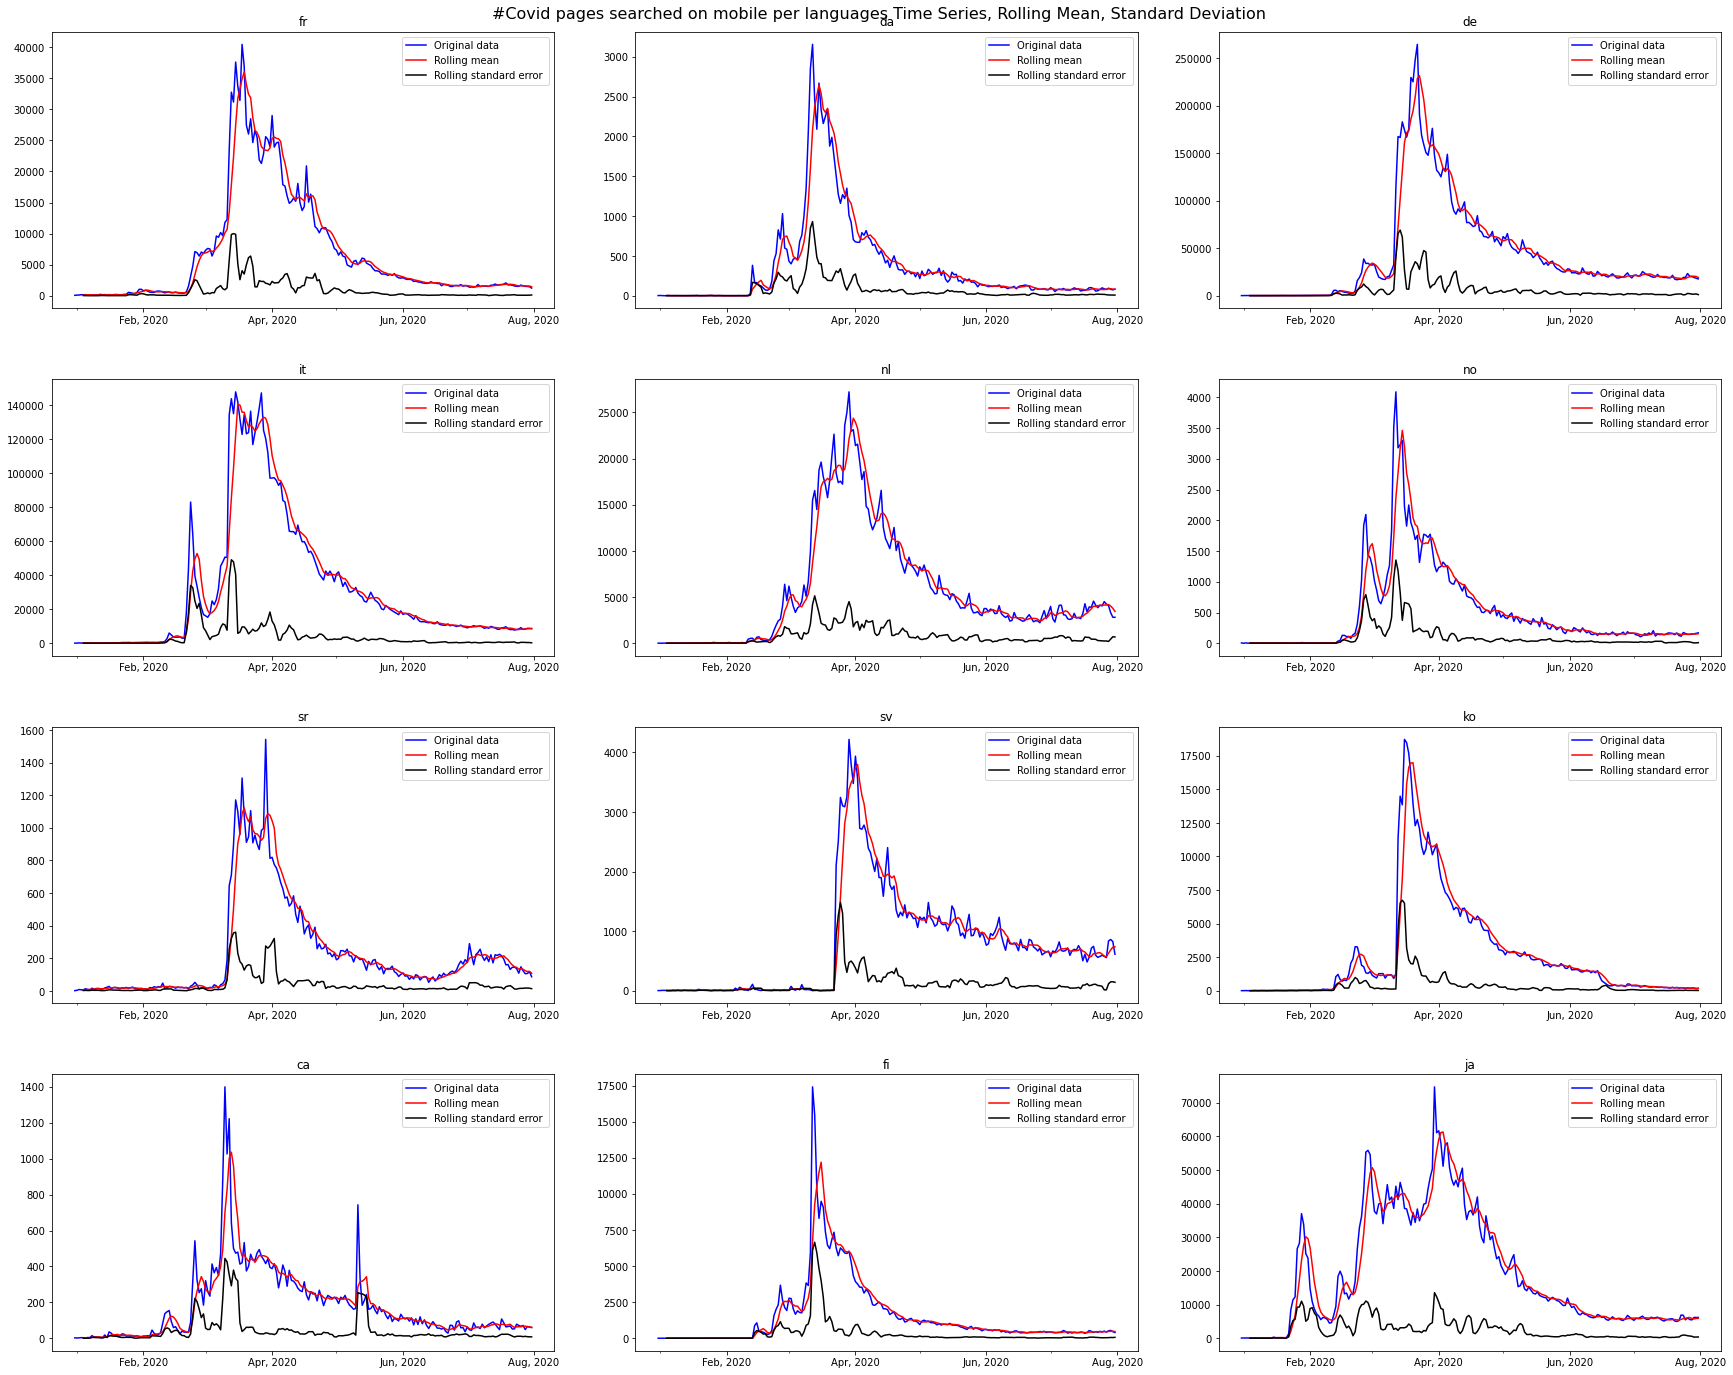

In [124]:

fig, axs = plt.subplots(4, 3)
fig.set_figwidth(25)
fig.set_figheight(20)
fig.tight_layout(pad=5.0)
half_year_locator = mdates.MonthLocator(interval=2)
month_year_formatter = mdates.DateFormatter('%b, %Y') 
monthly_locator = mdates.MonthLocator()
fig.suptitle("#Covid pages searched on mobile per languages Time Series, Rolling Mean, Standard Deviation", fontsize=16)


x = 0
y = 0
for language in interventions['lang']:
    if (language != "en"):
        #Compute the rolling mean for each country over 5 days
        covid_pages_mobile[language]["rolling_mean"] = covid_pages_mobile[language][0].rolling(5).mean()
    
        #Compute the rolling standard error for each country over 5 days
        covid_pages_mobile[language]["rolling_std"] = covid_pages_mobile[language][0].rolling(5).std()

       

        #Plot the evolution of the number of pages search on desktop per language
        axs[x, y].plot(covid_pages_mobile[language][0],label='Original data',  color="blue")
        axs[x, y].plot(covid_pages_mobile[language]["rolling_mean"],label='Rolling mean',  color="red")
        axs[x, y].plot(covid_pages_mobile[language]["rolling_std"],label='Rolling standard error ',  color="black")
        axs[x, y].xaxis.set_major_locator(half_year_locator)
        axs[x, y].xaxis.set_minor_locator(monthly_locator)
        axs[x, y].xaxis.set_major_formatter(month_year_formatter)
        axs[x, y].set_title(str(language))
        axs[x, y].legend()

        
        #print('x equals {} and y equals {}'.format(x,y))
    
        y = y +1
        if y == 3:
            y = 0
            x = x +1



Now let's apply the test

In [159]:

# Pass the dataframe into the adfuller method
adfuller_df_mobile = pd.DataFrame({"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

print('Dickey Fuller test for mobile covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_mobile[language][0]
        adft = adfuller(df,autolag="AIC")

        output_df = pd.DataFrame({str(language):[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] })
        adfuller_df_mobile = pd.concat([adfuller_df_mobile, output_df], axis=1)
adfuller_df_mobile

Dickey Fuller test for desktop covid related searches:


,Metric,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,Test Statistics,-1.523275,-2.052919,-1.751455,-1.807033,-2.161752,-1.950262,-1.999605,-1.928467,-2.022056,-3.544568,-2.286031,-1.703444
1,p-value,0.521968,0.263862,0.404815,0.376975,0.220419,0.308798,0.286746,0.318790,0.276987,0.006914,0.176513,0.429339
2,No. of lags used,15.000000,1.000000,11.000000,1.000000,15.000000,14.000000,3.000000,0.000000,13.000000,0.000000,2.000000,0.000000
3,Number of observations used,198.000000,212.000000,202.000000,212.000000,198.000000,199.000000,210.000000,213.000000,200.000000,213.000000,211.000000,213.000000
4,critical value (1%),-3.463815,-3.461578,-3.463144,-3.461578,-3.463815,-3.463645,-3.461879,-3.461429,-3.463476,-3.461429,-3.461727,-3.461429
5,critical value (5%),-2.876251,-2.875272,-2.875957,-2.875272,-2.876251,-2.876176,-2.875404,-2.875207,-2.876102,-2.875207,-2.875337,-2.875207
6,critical value (10%),-2.574611,-2.574089,-2.574455,-2.574089,-2.574611,-2.574572,-2.574159,-2.574054,-2.574532,-2.574054,-2.574124,-2.574054


### Check for autocorrelation

1. Desktop searches

In [157]:
autocorr_desktop = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})

print('Autocorrelation for desktop covid related searches:')
for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_desktop[language][0]
        autocorrelation_lag1 = df.autocorr(lag=1)
        autocorrelation_lag3 = df.autocorr(lag=3)
        autocorrelation_lag10 = df.autocorr(lag=10)
        autocorrelation_lag30 = df.autocorr(lag=30)

        output_df = pd.DataFrame({str(language):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
        autocorr_desktop = pd.concat([autocorr_desktop, output_df], axis=1)
autocorr_desktop

Autocorrelation for desktop covid related searches:


,Autocorrelation,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,One day Lag:,0.972707,0.874591,0.963964,0.969452,0.964837,0.900809,0.835514,0.937444,0.954027,0.881608,0.945644,0.962768
1,Three day Lag:,0.938418,0.794340,0.918572,0.928174,0.920278,0.741997,0.790157,0.802505,0.910050,0.772429,0.863202,0.919553
2,Ten day Lag,0.806925,0.559232,0.699373,0.746688,0.774014,0.616309,0.603378,0.516978,0.684384,0.629672,0.671115,0.809608
3,One Month Lag:,0.256011,0.269984,0.129020,0.178705,0.207985,0.260065,0.049888,0.127906,0.166597,0.257166,0.052732,0.321374


2. Mobile searches

In [158]:
autocorr_mobile  = pd.DataFrame({"Autocorrelation":["One day Lag:","Three day Lag:","Ten day Lag","One Month Lag: "]})
print('Autocorrelation for mobile covid related searches:')

for language in interventions['lang']:
    if (language != "en"):
        df = covid_pages_mobile[language][0]
        autocorrelation_lag1 = df.autocorr(lag=1)
        autocorrelation_lag3 = df.autocorr(lag=3)
        autocorrelation_lag10 = df.autocorr(lag=10)
        autocorrelation_lag30 = df.autocorr(lag=30)

        output_df = pd.DataFrame({str(language):[autocorrelation_lag1, autocorrelation_lag3,autocorrelation_lag10,autocorrelation_lag30] })
        autocorr_mobile = pd.concat([autocorr_mobile, output_df], axis=1)
autocorr_mobile

Autocorrelation for mobile covid related searches:


,Autocorrelation,fr,da,de,it,nl,no,sr,sv,ko,ca,fi,ja
0,One day Lag:,0.978073,0.971887,0.978402,0.977987,0.981720,0.960093,0.962004,0.968910,0.973769,0.889460,0.924467,0.976072
1,Three day Lag:,0.937578,0.896204,0.914190,0.924368,0.940653,0.849059,0.911041,0.902011,0.892377,0.731498,0.786595,0.918886
2,Ten day Lag,0.746222,0.607095,0.659724,0.738779,0.798233,0.618667,0.656322,0.572981,0.592991,0.550630,0.575560,0.744212
3,One Month Lag:,0.169371,0.028092,0.090764,0.157883,0.167413,0.088771,-0.016705,0.097823,0.140830,0.151276,0.026205,0.464570


### Check for Decomposition

1. Desktop related searches

<Figure size 1440x720 with 0 Axes>

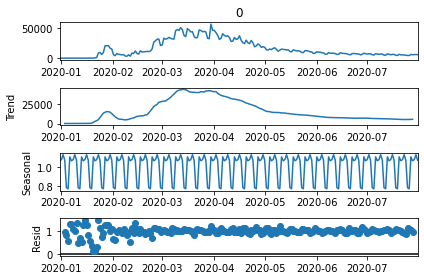

In [175]:
from statsmodels.tsa.seasonal import seasonal_decompose
# We choose an multiplicative model as the seasonality depends on the trend
plt.figure(figsize=(20, 10))
for language in interventions['lang']:
    if (language == "ja"):
        df = covid_pages_desktop[language][0]
        decompose = seasonal_decompose(df,model='multiplicative', period=7) ## Change the decompsition period 7 shows best pattern multiplicative
        decompose.plot()
        plt.show()

From the plot we can clearly see an overall increase in covid related pageviews at the beginning of 2020. We can also observe a seasonality pattern with a rise and fall each week. 